# Patient generator

In [205]:
import random
import numpy as np

class Patient:
    def __init__(self, template):
        self.mortality_score = np.clip(template['mortality_score'] + np.random.normal(0, template.get('mortality_std', 0)), 0.05, 0.95) # if it reach 1, patient will die in the next day
        self.category = np.random.choice(template['category'])
        self.waiting_day = 0 # tracking of waiting day
        self.admission_priority = 0 # tracking the admission priority under different strategy
        self.discharge_score = 0 #if it reach 1, patient will be discharged in the next day
        self.hospitalization_day = 0 # tracking of waiting day

def generate_patients(templates, weights, num_patients):
    patients = []
    for _ in range(num_patients):
        random_template = random.choices(templates, weights, k=1)[0]
        patient = Patient(random_template)
        patients.append(patient)
    return patients

In [206]:
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

templates = [template_disease, template_survey]
weights=[0.8, 0.2]

patients = []
patients = generate_patients(templates, weights, 5)

for i, patient in enumerate(patients, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Patient 1:
  Mortality Score: 0.1877269788933834
  Waiting Time: 0
  Category: 0

Patient 2:
  Mortality Score: 0.05
  Waiting Time: 0
  Category: 0

Patient 3:
  Mortality Score: 0.09390503497409511
  Waiting Time: 0
  Category: 0

Patient 4:
  Mortality Score: 0.2552992425490841
  Waiting Time: 0
  Category: 0

Patient 5:
  Mortality Score: 0.30381148357326215
  Waiting Time: 0
  Category: 0



# Admission waiting
- With each waiting day, the mortality rate increases by 10% on average and is drawn from a normal distribution with a standard deviation of 5%.
- With this formula, mortality > 50% will only increase during waiting

In [207]:
# Each day of waiting
def waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients):
    '''
    mortality_inflation: rate of
    templates: list of patient template for new patient generation
    weights: possibility of each patient template being selected
    num_patients: number of new patient added per day
    '''
    # modify the old patients
    admission_waiting_list_copy = admission_waiting_list.copy()
    for patient in admission_waiting_list_copy:
        if patient.mortality_score >= 1:
            waiting_to_dead_list.append(patient)
            admission_waiting_list.remove(patient)
            continue
        patient.waiting_day += 1
        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_inflation, 0.05), 0, 1)
    # add new patients
    new_patients = generate_patients(templates, weights, num_patients)
    admission_waiting_list.extend(new_patients)
    return admission_waiting_list, waiting_to_dead_list

In [208]:
# Initialization
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

templates = [template_disease, template_survey]
weights=[0.8, 0.2]
num_patients = 5
mortality_inflation = 1.1

admission_waiting_list = generate_patients(templates, weights, num_patients)
waiting_to_dead_list = []

# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.4393435053486344
  Waiting Time: 0
  Category: 0

Patient 2:
  Mortality Score: 0.422341784795247
  Waiting Time: 0
  Category: 0

Patient 3:
  Mortality Score: 0.349516312677958
  Waiting Time: 0
  Category: 0

Patient 4:
  Mortality Score: 0.2181621007042714
  Waiting Time: 0
  Category: 0

Patient 5:
  Mortality Score: 0.09157357812059723
  Waiting Time: 0
  Category: 3

Waiting to Dead List:


In [209]:
# Each day of waiting
admission_waiting_list, waiting_to_dead_list = waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients)

# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.5204532783232495
  Waiting Time: 1
  Category: 0

Patient 2:
  Mortality Score: 0.38998566176333027
  Waiting Time: 1
  Category: 0

Patient 3:
  Mortality Score: 0.2900625191658237
  Waiting Time: 1
  Category: 0

Patient 4:
  Mortality Score: 0.29166743681734275
  Waiting Time: 1
  Category: 0

Patient 5:
  Mortality Score: 0.12108765400037091
  Waiting Time: 1
  Category: 3

Patient 6:
  Mortality Score: 0.11867028597119478
  Waiting Time: 0
  Category: 2

Patient 7:
  Mortality Score: 0.1946229502421626
  Waiting Time: 0
  Category: 0

Patient 8:
  Mortality Score: 0.3025873832001936
  Waiting Time: 0
  Category: 0

Patient 9:
  Mortality Score: 0.4443318674698764
  Waiting Time: 0
  Category: 0

Patient 10:
  Mortality Score: 0.3510892659770376
  Waiting Time: 0
  Category: 0

Waiting to Dead List:


# Hospital

Ideas to add
- variable bed number of each team.

In [210]:
class Hospital:
    def __init__(self, bed_dict, bed_count=30, team_count=3):
        self.bed_dict = bed_dict # key is 0-29 (bed number), value is a tuple (medical team, patient)
        self.bed_count = bed_count # max length of bed_list
        self.team_count = team_count
        self.team_patient = np.zeros(team_count)
        self.team_category = np.zeros((team_count, 5)) # array storing number of day since the last encounter for a specific category (column) of patient for each team (row)
        self.available_bed = list(range(bed_count))

In [211]:
hospital = Hospital(bed_dict={}, bed_count=30, team_count=3)

# Calling admission

In [212]:
def calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold=0.9, preference_weight=[1,1,1]):
    '''
    preference_weight: relative weight of mortality, patient waiting time, educational value (it will be normalize spontaneously)
    '''
    ##### queue the admission waiting list
    # sort the emergent patient with high mortality to the front
    if len(admission_waiting_list) == 0:
        return hospital, admission_waiting_list

    admission_waiting_list.sort(key=lambda patient: patient.mortality_score, reverse=True)
    first_nonemergent_patient = next((i for i, patient in enumerate(admission_waiting_list) if patient.mortality_score <= emergent_mortality_threshold), len(admission_waiting_list))

    # Normalize preference_weight
    preference_weight = np.array(preference_weight)/sum(preference_weight)
    max_waiting_day = max(patient.waiting_day for patient in admission_waiting_list[first_nonemergent_patient:])

    # Calculate the education preference
    team_category_array = hospital.team_category.copy()
    available_team = []
    # If a medical team is full, we don't consider their preference
    for team in range(hospital.team_count):
        if hospital.team_patient[team]>=10:
            team_category_array[team] = np.zeros(5)
        else:
            available_team.append(team) # the team that can handel newly admitted patients

    if np.any(team_category_array != 0):
        team_category_array = np.sum(team_category_array, axis=0)/np.sum(team_category_array) #column sum and noramlize for each patient category
    else:
        team_category_array = np.zeros(5)

    # Sort nonemergent patient based on preference
    for patient in admission_waiting_list[first_nonemergent_patient:]:
        preference_data = np.array([patient.mortality_score, patient.waiting_day/(max_waiting_day+1), team_category_array[patient.category]])
        patient.admission_priority = np.dot(preference_weight, preference_data)

    admission_waiting_list[first_nonemergent_patient:].sort(key=lambda patient: patient.admission_priority, reverse=True)

    ##### calling patient for empty bed
    hospital_available_bed_copy = hospital.available_bed.copy()
    for bed_no in hospital_available_bed_copy:
        hospital.available_bed.remove(bed_no)
        patient = admission_waiting_list.pop(0)
        selected_team = available_team[np.argmax(hospital.team_category[available_team,patient.category])]
        hospital.bed_dict[bed_no] = (selected_team, patient)
        hospital.team_patient[selected_team] +=1 #The team had one more patient
        if hospital.team_patient[selected_team] >=10:
            available_team.remove(selected_team) # The team is no more available
        if len(admission_waiting_list) == 0:
            break
    return hospital, admission_waiting_list

In [214]:
preference_weight=[1,1,1]
emergent_mortality_threshold=0.9

hospital, admission_waiting_list = calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold, preference_weight)

print(hospital.bed_dict)
print(hospital.team_patient)
print(hospital.team_category)
print(hospital.available_bed)

{0: (0, <__main__.Patient object at 0x7ef4ac609450>), 1: (0, <__main__.Patient object at 0x7ef4ac6c7670>), 2: (0, <__main__.Patient object at 0x7ef4ac6091e0>), 3: (0, <__main__.Patient object at 0x7ef4ac6c59c0>), 4: (0, <__main__.Patient object at 0x7ef4ac6c5f90>), 5: (0, <__main__.Patient object at 0x7ef4ac608be0>), 6: (0, <__main__.Patient object at 0x7ef4ac608d90>), 7: (0, <__main__.Patient object at 0x7ef4e06c6f50>), 8: (0, <__main__.Patient object at 0x7ef4ac60beb0>), 9: (0, <__main__.Patient object at 0x7ef4ac6efe20>)}
[10.  0.  0.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Hospital day

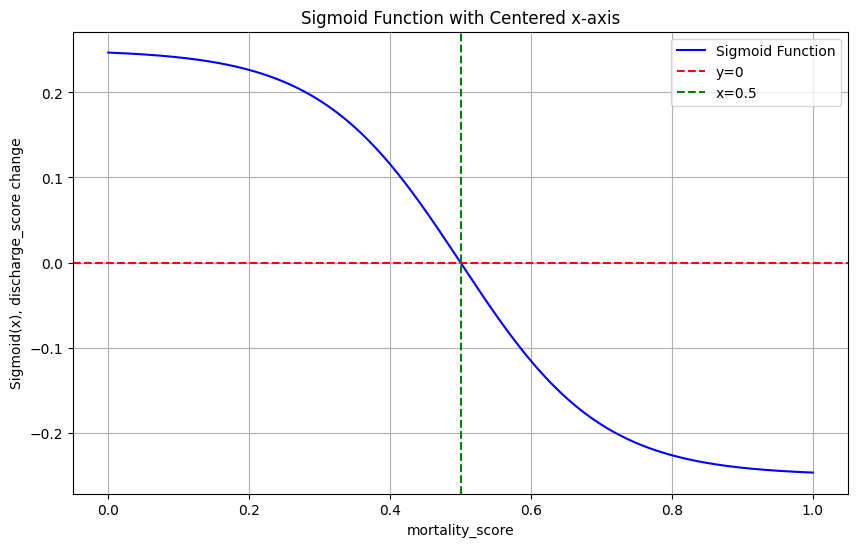

In [359]:
# use mortality_score to calulate the change of discharge_score
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return - 0.5 / (1 + np.exp((-x+0.5)*10)) + 0.25

x = np.linspace(0, 1, 400)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.axvline(0.5, color='green', linestyle='--', label='x=0.5')
plt.xlabel('mortality_score')
plt.ylabel('Sigmoid(x), discharge_score change')
plt.title('Sigmoid Function with Centered x-axis')
plt.legend()
plt.grid(True)
plt.show()

def hospital_day(hospital, mortality_reduction):
    # modify team_category in hospital
    hospital.team_category = hospital.team_category + 1

    # modify mortality_score, discharge_score, hospitalization_day in paitents
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():

        unfamiliarity = hospital.team_category[team_no , patient.category] + 1 # how long the team had no experience taking care of such patient

        patient.mortality_score = np.clip(np.random.normal(patient.mortality_score * mortality_reduction, 0.1 * unfamiliarity), 0, 1)
        patient.discharge_score = np.clip((patient.discharge_score + sigmoid(patient.mortality_score) - unfamiliarity / 10), 0, 1)
        patient.hospitalization_day += 1

        hospital.team_category[team_no, patient.category] = 0 # become familier after caring for patient
    return hospital


In [216]:
mortality_reduction = 0.8
hospital = hospital_day(hospital, mortality_reduction)

print(hospital.bed_dict)
print(hospital.team_patient)
print(hospital.team_category)
print(hospital.available_bed)

{0: (0, <__main__.Patient object at 0x7ef4ac609450>), 1: (0, <__main__.Patient object at 0x7ef4ac6c7670>), 2: (0, <__main__.Patient object at 0x7ef4ac6091e0>), 3: (0, <__main__.Patient object at 0x7ef4ac6c59c0>), 4: (0, <__main__.Patient object at 0x7ef4ac6c5f90>), 5: (0, <__main__.Patient object at 0x7ef4ac608be0>), 6: (0, <__main__.Patient object at 0x7ef4ac608d90>), 7: (0, <__main__.Patient object at 0x7ef4e06c6f50>), 8: (0, <__main__.Patient object at 0x7ef4ac60beb0>), 9: (0, <__main__.Patient object at 0x7ef4ac6efe20>)}
[10.  0.  0.]
[[0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# Hospital discharge

In [228]:
def hospital_discharge(hospital, discharge_alive_list, discharge_dead_list):
    hospital_bed_dict_copy = hospital.bed_dict.copy()
    for bed_no, (team_no, patient) in hospital_bed_dict_copy.items():
        if patient.mortality_score >= 1:
            dead_patient = hospital.bed_dict.pop(bed_no)
            discharge_dead_list.append(dead_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
        elif patient.discharge_score >= 1:
            discharged_patient = hospital.bed_dict.pop(bed_no)
            discharge_alive_list.append(discharged_patient)
            hospital.team_patient[team_no] -=1
            hospital.available_bed.append(bed_no)
    return hospital, discharge_alive_list, discharge_dead_list

In [218]:
discharge_alive_list = []
discharge_dead_list = []

hospital, discharge_alive_list, discharge_dead_list = hospital_discharge(hospital, discharge_alive_list, discharge_dead_list)

# A day in the hospital

In [363]:
discharge_alive_list = []
discharge_dead_list = []
waiting_to_dead_list = []

# Parameter in patient generation and waiting admission
template_disease = {
    'mortality_score': 0.25,
    'mortality_std': 0.125,
    'category': [0]
}

template_survey = {
    'mortality_score': 0.1,
    'mortality_std': 0.05,
    'category': [1, 2, 3, 4]
}

templates = [template_disease, template_survey]
weights=[0.8, 0.2]
num_patients = 5
mortality_inflation = 1.1

admission_waiting_list = generate_patients(templates, weights, num_patients)

# Parameter for calling admission
preference_weight=[1,1,1]
emergent_mortality_threshold=0.9

In [365]:
days = 20
for _ in range(days):
    # Discharge
    hospital, discharge_alive_list, discharge_dead_list = hospital_discharge(hospital, discharge_alive_list, discharge_dead_list)

    # Calling admission
    hospital, admission_waiting_list = calling_admission(hospital, admission_waiting_list, emergent_mortality_threshold, preference_weight)

    # Passing of the day in waiting list
    admission_waiting_list, waiting_to_dead_list = waiting_patients_day(admission_waiting_list, waiting_to_dead_list, mortality_inflation, templates, weights, num_patients)

    # Passing of the day in hospital
    hospital = hospital_day(hospital, mortality_reduction)

In [366]:
# Print results
print("Admission Waiting List:")
for i, patient in enumerate(admission_waiting_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

print("Waiting to Dead List:")
for i, patient in enumerate(waiting_to_dead_list, start=1):
    print(f"Patient {i}:")
    print(f"  Mortality Score: {patient.mortality_score}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Category: {patient.category}")
    print()

Admission Waiting List:
Patient 1:
  Mortality Score: 0.6308098410578673
  Waiting Time: 14
  Category: 0

Patient 2:
  Mortality Score: 0.597042615499308
  Waiting Time: 3
  Category: 0

Patient 3:
  Mortality Score: 0.5984955379242367
  Waiting Time: 4
  Category: 0

Patient 4:
  Mortality Score: 0.7161009106811029
  Waiting Time: 4
  Category: 0

Patient 5:
  Mortality Score: 0.5367729003930802
  Waiting Time: 5
  Category: 0

Patient 6:
  Mortality Score: 0.4137246453694103
  Waiting Time: 16
  Category: 0

Patient 7:
  Mortality Score: 0.45686202629239664
  Waiting Time: 6
  Category: 0

Patient 8:
  Mortality Score: 0.5052836498990715
  Waiting Time: 8
  Category: 2

Patient 9:
  Mortality Score: 0.4663582488749982
  Waiting Time: 10
  Category: 3

Patient 10:
  Mortality Score: 0.3983269304351916
  Waiting Time: 6
  Category: 0

Patient 11:
  Mortality Score: 0.400211758555743
  Waiting Time: 1
  Category: 0

Patient 12:
  Mortality Score: 0.3540266006919954
  Waiting Time: 4
  

In [367]:
discharge_alive_list

[(0, <__main__.Patient at 0x7ef4e0736650>),
 (1, <__main__.Patient at 0x7ef4e0791360>),
 (0, <__main__.Patient at 0x7ef4e0737340>),
 (1, <__main__.Patient at 0x7ef4e0791f60>),
 (1, <__main__.Patient at 0x7ef4e0734ee0>),
 (1, <__main__.Patient at 0x7ef4e07359f0>),
 (1, <__main__.Patient at 0x7ef4e0737370>),
 (1, <__main__.Patient at 0x7ef4ac5778e0>),
 (0, <__main__.Patient at 0x7ef4ac576380>),
 (2, <__main__.Patient at 0x7ef4ac5761d0>),
 (0, <__main__.Patient at 0x7ef4ac6c7a90>),
 (1, <__main__.Patient at 0x7ef4ac577be0>),
 (0, <__main__.Patient at 0x7ef4e0735900>),
 (0, <__main__.Patient at 0x7ef4ac576290>),
 (1, <__main__.Patient at 0x7ef4ac576a10>),
 (2, <__main__.Patient at 0x7ef4e0735450>),
 (2, <__main__.Patient at 0x7ef4e07375e0>),
 (1, <__main__.Patient at 0x7ef4e0737040>),
 (1, <__main__.Patient at 0x7ef4ac6c4d30>),
 (0, <__main__.Patient at 0x7ef4ac6c5480>),
 (2, <__main__.Patient at 0x7ef4ac575c60>),
 (0, <__main__.Patient at 0x7ef4ac6c6560>),
 (2, <__main__.Patient at 0x7ef4

In [368]:
discharge_dead_list

[(2, <__main__.Patient at 0x7ef4e07372e0>),
 (0, <__main__.Patient at 0x7ef4acb6a4a0>),
 (2, <__main__.Patient at 0x7ef4ac6c47c0>),
 (0, <__main__.Patient at 0x7ef4ac6c73d0>)]

In [371]:
for i, (team, patient) in enumerate(discharge_alive_list, start=1):
    print(f"Patient {i}:")
    print(f"  Care Team: {team} ")
    print(f"  Category: {patient.category}")
    print(f"  Waiting Time: {patient.waiting_day}")
    print(f"  Admission Duration: {patient.hospitalization_day}")
    print(f"  Admission Priority Upon admission: {patient.admission_priority}")
    print(f"  Discharge Score: {patient.discharge_score}")
    print(f"  Mortality Score: {patient.mortality_score}")
    print()

Patient 1:
  Care Team: 0 
  Category: 0
  Waiting Time: 3
  Admission Duration: 8
  Admission Priority Upon admission: 0.18609406470370682
  Discharge Score: 1.0
  Mortality Score: 0.12704455703651718

Patient 2:
  Care Team: 1 
  Category: 0
  Waiting Time: 3
  Admission Duration: 6
  Admission Priority Upon admission: 0.15901442875490818
  Discharge Score: 1.0
  Mortality Score: 0.001772332492106718

Patient 3:
  Care Team: 0 
  Category: 0
  Waiting Time: 2
  Admission Duration: 14
  Admission Priority Upon admission: 0.19096919649925276
  Discharge Score: 1.0
  Mortality Score: 0.19058714944397143

Patient 4:
  Care Team: 1 
  Category: 0
  Waiting Time: 0
  Admission Duration: 8
  Admission Priority Upon admission: 0.08381544406187792
  Discharge Score: 1.0
  Mortality Score: 0.21404932138581317

Patient 5:
  Care Team: 1 
  Category: 0
  Waiting Time: 0
  Admission Duration: 7
  Admission Priority Upon admission: 0.09672481391281829
  Discharge Score: 1.0
  Mortality Score: 0.11